In [198]:
import os
os.chdir("C:\\Users\\bizet\\Desktop\\Kaggle Challenge")
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import random
from random import randint
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn.linear_model import LogisticRegression

In [199]:
#Load Data
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [200]:
count_nan = len(df) - df.count()
count_nan

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cleaning data

In [201]:
df.drop('Cabin', 1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


### cleaning Age and insert random numbers to missing values in Age

In [202]:
mean = int(round(df['Age'].mean()))
sd = int(round(df['Age'].std()))
df["Age"].fillna(randint(mean - sd, mean + sd), inplace=True)
df["Age"] = df["Age"]/max(df["Age"])
df["Age"]

0      0.2750
1      0.4750
2      0.3250
3      0.4375
4      0.4375
5      0.3125
6      0.6750
7      0.0250
8      0.3375
9      0.1750
10     0.0500
11     0.7250
12     0.2500
13     0.4875
14     0.1750
15     0.6875
16     0.0250
17     0.3125
18     0.3875
19     0.3125
20     0.4375
21     0.4250
22     0.1875
23     0.3500
24     0.1000
25     0.4750
26     0.3125
27     0.2375
28     0.3125
29     0.3125
        ...  
861    0.2625
862    0.6000
863    0.3125
864    0.3000
865    0.5250
866    0.3375
867    0.3875
868    0.3125
869    0.0500
870    0.3250
871    0.5875
872    0.4125
873    0.5875
874    0.3500
875    0.1875
876    0.2500
877    0.2375
878    0.3125
879    0.7000
880    0.3125
881    0.4125
882    0.2750
883    0.3500
884    0.3125
885    0.4875
886    0.3375
887    0.2375
888    0.3125
889    0.3250
890    0.4000
Name: Age, Length: 891, dtype: float64

## Creating Family Size

In [203]:
df["Fsize"] = df["SibSp"] + df["Parch"] + 1
df["Fsize"] = df["Fsize"]/max(df["Fsize"])
df["Fsize"]

0      0.181818
1      0.181818
2      0.090909
3      0.181818
4      0.090909
5      0.090909
6      0.090909
7      0.454545
8      0.272727
9      0.181818
10     0.272727
11     0.090909
12     0.090909
13     0.636364
14     0.090909
15     0.090909
16     0.545455
17     0.090909
18     0.181818
19     0.090909
20     0.090909
21     0.090909
22     0.090909
23     0.090909
24     0.454545
25     0.636364
26     0.090909
27     0.545455
28     0.090909
29     0.090909
         ...   
861    0.181818
862    0.090909
863    1.000000
864    0.090909
865    0.090909
866    0.181818
867    0.090909
868    0.090909
869    0.272727
870    0.090909
871    0.272727
872    0.090909
873    0.090909
874    0.181818
875    0.090909
876    0.090909
877    0.090909
878    0.090909
879    0.181818
880    0.181818
881    0.090909
882    0.090909
883    0.090909
884    0.090909
885    0.545455
886    0.090909
887    0.090909
888    0.363636
889    0.090909
890    0.090909
Name: Fsize, Length: 891

### Removing missing value to embarked

In [204]:
df["Embarked"].fillna("S", inplace=True)

In [205]:
df["Pclass"] = df["Pclass"]/max(df["Pclass"])

### Regression model

In [206]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fsize + C(Embarked)'
results = {}

In [207]:
y,x = dmatrices(formula, data=df, return_type='dataframe')
model = sm.Logit(y,x)
Model = LogisticRegression()
res = model.fit()
res2 = Model.fit(x,y)
results['Logit'] = [res2, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.441969
         Iterations 6


C:\Users\bizet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bizet\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\bizet\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\bizet\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\bizet\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                  0.3363
Time:                        18:05:31   Log-Likelihood:                -393.79
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.968e-81
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            4.1526        nan        nan        nan         nan         nan
C(Pclass)[T.0.66666666666666663]    -1.0188      0.269     -3.793      0.000      -1.545      -0.492
C(Pclass)[T.1.0]                    -2.2881      0.254     -9.002      0.000      -2.786      -1.790
C(Sex)[T.male]                      -2.7263      0.200    -13.604      0.000      -3.119      -2.334
C(Embarked)[T.Q]                    -0.1285      0.380     -0.338      0.735      -0.873       0.616
C(Embarked)[T.S]                    -0.4629      0.236     -1.963      0.050      -0.925      -0.001
Age                                 -2.9936      0.620     -4.829      0.000      -4.209      -1.778
SibSp                               -0.3345        nan        nan        nan         nan         nan
Parch                               -0.0918        nan        nan        nan         nan         nan
Fsize                                0.3388        nan        nan        nan         nan         nan
====================================================================================================
"""

C:\Users\bizet\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


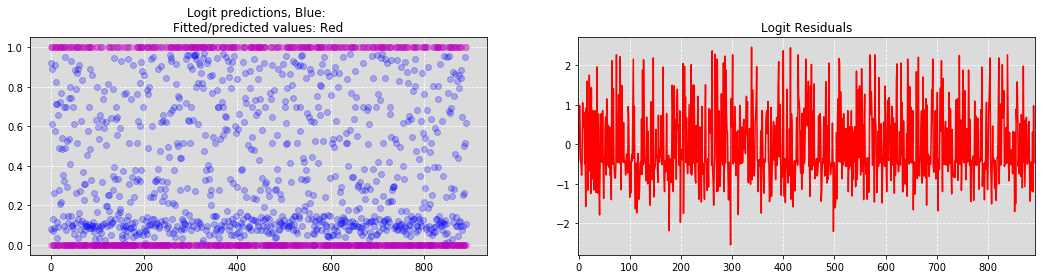

In [208]:
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")


ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');


### Test Data

In [209]:
test = pd.read_csv('test.csv')


In [210]:
test.drop('Cabin', 1, inplace = True)

mean = int(round(test['Age'].mean()))
sd = int(round(test['Age'].std()))
test["Age"].fillna(randint(mean - sd, mean + sd), inplace=True)
test["Age"] = test["Age"]/max(test["Age"])

test["Fsize"] = test["SibSp"] + test["Parch"] + 1
test["Fsize"] = test["Fsize"]/max(test["Fsize"])

test["Embarked"].fillna("S", inplace=True)

test["Pclass"] = df["Pclass"]/max(df["Pclass"])

test["Survived"] = 1.1

test_1 = test.drop("PassengerId", axis=1)

In [211]:
y_test,x_test = dmatrices(formula, data=test_1, return_type='dataframe')

In [212]:
predict_result = Model.predict(x_test)

In [213]:
Model.score(x, y)

0.7991021324354658

In [214]:
Logit_Reg_Submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predict_result
})

In [196]:
Logit_Reg_Submission.to_csv("Logit_Reg_Submission.csv")